In [305]:
import sklearn
from sklearn import linear_model
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [353]:
data = pd.read_csv('student-por.csv', sep=';')

In [354]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [355]:
model_data = pd.DataFrame()
model_data['studytime'] = data['studytime']
model_data['failures'] = data['failures']
model_data['absences'] = data['absences']
model_data['G1'] = data['G1']
model_data['G2'] = data['G2']
# model_data['G3'] = data['G3']
model_data = np.array(model_data)
prediction_data = np.array(data['G3'])

In [364]:
# model_data

In [357]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(model_data, prediction_data, test_size=0.2)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [358]:
score = linear.score(x_test,y_test)
print("model score = ", score)
print("model Coefficient = ", linear.coef_)
print("model intercept = ", linear.intercept_)

model score =  0.900068613640426
model Coefficient =  [ 0.10296274 -0.24302894  0.02056719  0.13977769  0.87091938]
model intercept =  0.03498026464409243


In [359]:
best_score = 0
for i in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(model_data, prediction_data, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    score = linear.score(x_test,y_test)
    if best_score < score:
        best_score = score
        print(score)
        with open('student_model.pickle', 'wb') as f:
            pickle.dump(linear, f)
        

0.830136321058909
0.8721831533461768
0.9333916180866328
0.9490070316040713


In [360]:
model_file = open('student_model.pickle', 'rb')
best_model = pickle.load(model_file)

In [361]:
best_model.score(x_test,y_test)

0.9076335558917288

In [362]:
# prediction = linear.predict(x_test)
# for x in range(len(prediction)):
#     print(prediction[x], x_test[x], y_test[x])
#     x_test[x]

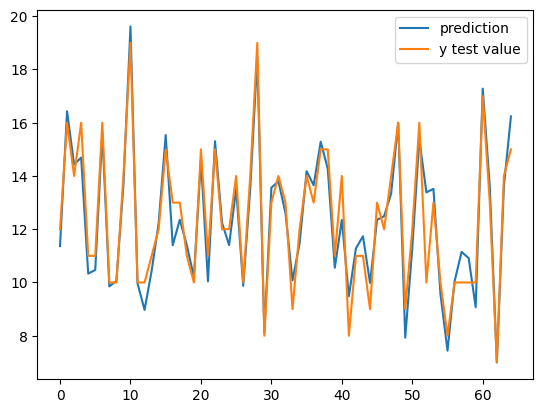

In [363]:
plt.plot(best_model.predict(x_test), label = "prediction")
plt.plot(y_test, label = "y test value")
# plt.plot(x_test)
plt.legend()
plt.show()